# Машинное обучение, ВМК МГУ

## Практическое задание 3. Метод опорных векторов и логистическая регрессия

### Общая информация

Дата выдачи: 9 ноября 2024 3:59

Мягкий дедлайн: 23:59 MSK 23 ноября 2024 (за каждый день просрочки снимается 1 балл)

Жесткий дедлайн: 23:59MSK 30 ноября 2024.

### О задании

В этом задании вы:
- настроите метод опорных векторов, визуализируете опорные вектора
- настроите логистическую регрессию
- познакомитесь с калибровочными кривыми и сравните вероятности, выдаваемые логистической регрессией и методом опорных векторов
- изучите методы работы с категориальными переменными
- в качестве бонуса попробуете библиотеку vowpal wabbit.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — **10 баллов + 5.7 бонусов**.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

<p style="color:#de3815;font-size:25px;">
Напоминание об оформлении и выполнении ноутбука
</p>

* Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть, не запуская ячейки (кроме редких случаев, когда необходимо намеренно скрыть ненужный output, про такие случаи желательно писать пояснения в тексте). **В противном случае -1 балл**
* При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. **Не нужно** удалять и видоизменять написанный код и текст, если явно не указана такая возможность. Создавать новые ячейки с кодом/текстов там, где это осмысленно и вы считаете необходимым, конечно, можно. **В противном случае -1 балл**
* В anytask обязательно нужно прикреплять отдельно файл с расширением ipynb (не в архиве, а именно отдельно). Если необходимо отправить еще какие-то файлы, то вынесите их в отдельный архив (если файлов много) и пришлите. **В противном случае -0.5 балла**
---
* Пишите, пожалуйста, выводы и ответы на вопросы в текстовых ячейках/при помощи print в коде/как результат вывода ячейки. При их отсутствии мы не можем понять, сделали ли вы задание и понимаете, что происходит, и **поэтому будем снижать баллы**
* Если алгоритм не сказано реализовывать явно, его всегда можно импортировать из библиотеки.
---
* Про графики. _Штрафы будут применяться к каждому результату команды отображения графика (plt.show() и др. аналогичные). Исключением являются графики, генерируемые функциями каких-либо сторонних библиотек, если их нельзя кастомизировать_

    * должно быть название (plt.title) графика; **В противном случае &ndash; -0.05 балла**
    * на графиках должны быть подписаны оси (plt.xlabel, plt.ylabel); **В противном случае &ndash; -0.025 балла за каждую ось**
    * должны быть подписаны единицы измерения (если это возможно); **В противном случае &ndash; -0.025 балла за каждую ось**
    * все названия должны быть понятны любому человеку, знакомому с терминологией, без заглядывания в код; **В противном случае &ndash; -0.05 балла**
    * подписи тиков на осях не должны сливаться как на одной оси, так и между ними; **В противном случае &ndash; -0.025 балла за каждую ось**
    * если изображено несколько сущностей на одном холсте (например несколько функций), то необходима поясняющая легенда (plt.legend); **В противном случае &ndash; -0.05 балла**
    * все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном); **В противном случае &ndash; -0.05 балла**
    * если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах);
    * графики должны быть не супер-микро и не супер-макро по размерам, так, чтобы можно было увидеть все, что нужно.
    * при необходимости улучшения наглядности графиков, можно пользоваться логарифмической шкалой по осям x/y.
    
### А также..

* Для удобства поиска вопросов, на которые от вас просят ответа, мы пометили их знаком **(?)**
* Знак **(!)** означает, что выполнение замечания необходимо для **возможности получения полного балла**
* Даем до +0.3 баллов за выдающиеся успехи по субъективному мнению проверяющих. Этот **бонус** не апеллируется

In [ ]:
import time
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
from sklearn import inspection, datasets
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay
from sklearn.metrics import accuracy_score, roc_auc_score, average_precision_score, roc_curve, precision_recall_curve
from sklearn.metrics import auc
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, TargetEncoder, MinMaxScaler
from sklearn.svm import LinearSVC, SVC



%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

# Метод опорных векторов (SVM)

#### Краткое изложение теории

Метод опорных векторов --- метод построения линейных классификаторов и регрессоров.

Пусть $\{(x_i, y_i)_{i=1}^l\}$ --- обучающая выборка. Исходная задача оптимизации ставится следующим образом:
$$
\sum \limits_{i=1}^l (1 - (\langle x_i, w \rangle - w_0)y_i)_+ + \frac{1}{2C}\|w\|^2 \to \min
$$

После перехода к двойственной задаче (выводилось на лекции К. В. Воронцова) получаем задачу оптимизации:
$$
\begin{cases}
g(\lambda) = \sum_{i=1}^l \lambda_i - \frac{1}{2} \sum_{i=1}^l \sum_{j=1}^l \lambda_i \lambda_j y_i y_j \langle x_i, x_j \rangle \to \underset{\lambda}{\max} \\
0 \le \lambda_i \le C \\
\sum_{i=1}^l \lambda_i y_i = 0
\end{cases}
$$

Пусть $\lambda$ --- решение двойственной задачи, $S$ --- множество индексов ненулевых координат $\lambda$. Тогда решением исходной задачи будет линейный классификатор:
$$
a(x) = sign \left( \sum_{i \in S} \lambda_i \langle x, x_i \rangle - w_0 \right)
$$

Признаками данного линейного классификатора будут $f_i(x) = \langle x, x_i\rangle, \, i \in S$.

Объекты $x_i, \, i \in S$ называются опорными, их нам необходимо хранить в памяти для вычисления признаков $f_i(x)$.

Вместо $\langle x, x_i \rangle$ можно использовать ядра $K(x, x_i)$. Ядра позволяют делать нелинейные преобразования признаков

В библиотеке sklearn реализованы: SVR (LinearSVR) --- SVM для задачи регрессии, SVC (LinearSVC) --- SVM для задачи классификации.

Версии Linear используют только линейное ядро $\langle x, x_i \rangle$. При использовании линейного ядра можно не переходить к двойственной задаче, поэтому в некоторых ситуациях LinearSVC учится быстрее чем SVC с kernel='linear'.

### Задание 1 **(1.1 баллов)**: Визуализация разделяющей кривой

В данном задании мы посмотрим на опорные векторы и разделяющие кривые, построенные SVC с различными ядрами

Для начала сгенерируем синтетический датасет

X.shape=(300, 2)	y.shape=(300,)


<ipython-input-2-e72b2aef5263>:11: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.scatterplot(


Text(0, 0.5, 'Feature 2')

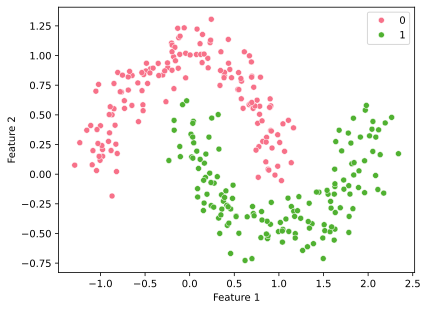

In [ ]:
X, y = datasets.make_moons(
    n_samples=300,
    random_state=42,
    noise=0.125,
)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=50)

print(f"{X.shape=}\t{y.shape=}")

sns.scatterplot(
    x=X[:, 0],
    y=X[:, 1],
    hue=y,
    palette=sns.color_palette("husl", 3)
)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

### Обучение SVM

**Задание 1.1 (0.2 балла):** Обучите SVM с линейным ядром (SVC из sklearn с ядром linear). Подберите нелинейное ядро для SVM (список ядер есть в документации).

Посчитайте accuracy. Классификатор с правильно подобранным нелинейным ядром должен выдавать accuracy, близкую к 1.

In [ ]:
# Linear kernel
linear_clf = #your code here


# Polynomial kernel
poly_clf = #your code here

### Построение опорных векторов и разделяющей кривой

**Задание 1.2 (0.9 баллов):** Визуализируйте опорные векторы и разделяющую кривую для обученных выше классификаторов.

Индексы опорных векторов хранятся в поле $\texttt{support\_vectors\_}$. Графики должны быть оформлены правильно, в соответствии с теми требованиями, которые были в первой лабороторной. Так же опорные вектора следует рисовать не другим цветом, а другой меткой (например, крестик), иначе теряется принадлежность к классу. Точки из разных классов рисуйте разными цветами (или разными фигурами). Если необходимо, можно вводить альфа-канал (степень прозрачности) для улучшения восприятия. Для лучшего понимания метода, рисуйте не только разделяющую кривую, но из "разделяющую полосу" вокруг прямой.

(!) При реализации функции plot_svc_predictions запрещено использовать готовые функции отрисовки разделяющей прямой/кривой для моделей.

In [ ]:
def plot_svc_predictions(model, data, y_data):
    '''
    Визуализация опорных векторов и разделяющей кривой

    Parameters:
        model: модель классификации
        data: классифицируемые данные
        y_data: метки

    '''
    pass

In [ ]:
# your code here

In [ ]:
# your code here

### Визуализация спрямляющего пространства

Ядро $K(x, y)$ является скалярным произведением в некотором линейном пространстве $V$, существует отображение $\varphi: K(x, y) = \langle \varphi(x), \varphi(y) \rangle$. В $V$ полученный классификатор с ядром $K$ будет линейным, разделяющей поверхонстью будет гиперплоскость.

**(Бонус) Задание 1.3 (1 балл):** В данном задании нужно восстановить отображение $\varphi$ и построить разделяющую гиперплоскость.

Так как ядра являются скалярными произведениями в пространствах большей размерности, то для визуализации нужно построить новый одномерный датасет

Text(0.5, 1.0, 'Feature 1 PDF estimation')

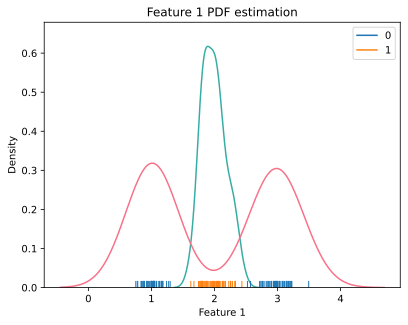

In [ ]:
_, ax = plt.subplots()

X = np.hstack([
    np.random.normal(loc=1.0, scale=0.15, size=(50, )),
    np.random.normal(loc=2.0, scale=0.2, size=(50, )),
    np.random.normal(loc=3.0, scale=0.15, size=(50, )),
]).reshape((-1, 1))

y = np.hstack((
    np.zeros(50, dtype=int),
    np.ones(50, dtype=int),
    np.zeros(50, dtype=int),
))

sns.kdeplot(
    x=X.squeeze(),
    hue=y,
    ax=ax,
    palette=sns.color_palette("husl", 2),
)

sns.rugplot(x=X.squeeze(), hue=y)

ax.set_xlabel('Feature 1')
ax.set_title('Feature 1 PDF estimation')

Обучите SVC с полиномиальным ядром степени 2

In [ ]:
clf = #your code here

На семинаре доказывалось, что полиномиальное ядро $(\langle x, y \rangle + R)^d$ является ядром.

(?) Найдите отображение $\varphi: K(x, y) = \langle \varphi(x), \varphi(y) \rangle$. Какая размерность получилась?

ОТВЕТ ТУТ

Постройте разделяющую кривую в $R^1$

In [ ]:
 #your code here

Постройте разделяющую гиперплоскость в спрямляющем пространстве

* hint: plt.figure.add_subplot(projection='3d')

In [ ]:
def phi(x: float) -> float:
    '''
    Отображение в спрямляющее пространство

    Parameters:
        x(float): Вектор в исходном пространстве R^1

    Returns:
        Вектор в спрямляющем пространстве
    '''

    pass

In [ ]:
#your code here

(?) Можно ли найти сечение плоскостью, которое позволит лучше визуализировать разделение по классам? Если да - реализуйте.

In [ ]:
#your code here

# Логистическая регрессия

Пусть выборка $\{(x_i, y_i)_{i=1}^l\}$ пришла из совместного распределения $(X, Y)$. Так как случайная величина $Y$ может принимать только 2 значения, то случайные величины $Y$ и $Y \mid X$ являются Бернулевскими (с точностью до нормировки). Мы хотим научиться предсказывать $\mathbb{P} (Y = 1 \mid X)$ некоторой функцией $f(X)$.

Запишем задачу максимизации правдоподобия:
$$
\prod_{i=1}^N f(x_i)^{[y_i = +1]} (1 - f(x_i))^{[y_i = -1]} \to \max
$$

Положим $f(x) = \sigma(\langle x, w \rangle + w_0)$. Вид данной функции подробно объяснялся на лекции и на семинаре.

Преобразовав исходную задачу оптимизации получим задачу оптимизации для обучения Логистической регрессии.
$$
\sum_{i=1}^l \log \left(1 + \exp(-y_i (\langle x, w \rangle + w_0)) \right) \to \min
$$

Мы строим $f(x)$ как оценку вероятности принадлежности объекта положительному классу. Величина $s_i = \langle x_i, w \rangle + w_0$ называется логитом (logit). Для решения задачи классификации объекта $x_i$ нет необходимости вычислять $f(x_i) = \sigma(s_i)$, достаточно проверить условие $s_i > 0$.

# Решение задачи предсказания оттока клиентов из банка

Далее мы будем решать задачу классификации: необходимо предсказать уйдет ли клиент из банка.

Для решения задачи будем использовать как LogisticRegression, так и SVM.  

В помощь вам предоставляется функция test_pipeline, обучающая и тестирующая вашу модель. Изучите ее архитектуру

In [ ]:
def test_pipeline(pipeline: Pipeline, data: pd.DataFrame, target, method: str = None, return_val_labels: bool = False, return_data_split: bool = False) -> np.ndarray:
    '''
    Обучение и валидация модели

    Parametrs:
        pipeline: score-based classifier
        data (pd.DataFrame): features
        target (pd.Series): target

    Returns:
        scores on validation dataset
    '''
    X_train, X_val, y_train, y_val = train_test_split(data, target, random_state=42, test_size=0.2)

    time_start = time.time()
    model = pipeline.fit(X_train, y_train)
    fit_time = time.time() - time_start

    scores = model.decision_function(X_val)

    acc = accuracy_score(y_val, scores > 0)
    roc_auc = roc_auc_score(y_val, scores)
    pr_auc = average_precision_score(y_val, scores)

    if method:
        print(f"Method: {method}", end='\t')
    print(f"{acc=:.3f} {roc_auc=:.3f}, {pr_auc=:.3f}, train_time={fit_time:.3f}s")

    if return_data_split:
        return scores, (X_train, X_val, y_train, y_val)
    elif return_val_labels:
        return scores, y_val
    else:
        return scores

**Задание 2.1 (0.75 баллов):** реализуйте функцию построения ROC и PR кривых для произвольного score-based классификатора. Функция должна выводить ROC-AUC и PR-AUC

* hint: sklearn.metrics.RocCurveDisplay, sklearn.metrics.PrecisionRecallDisplay

In [ ]:
def build_curves(scores: np.ndarray, target: np.ndarray, method: str = None) -> None:
    '''
    Построение ROC и PR кривых
    '''
    # подсичтаем нужные данные для построения кривых
    #your code here

    # напечатаем площади под граффиками
    #your code here

    # построим граффики для соответсвтующих кривых
    #your code here


**Задание 2.2 (0.3 балла):** Загрузка и предобработка датасета.

Загрузите датасет из файла ./train.csv

Целевой переменной будет являться Exited

(?)Какие признаки будут являться числовыми, какие категориальными? Что ещё можно посмотреть на данном этапе?

In [ ]:
dts =  #your code here
dts.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [ ]:
numerical_features = #your code here
categorical_features = #your code here
text_features = #your code here

**Задание 2.3 (0.5 баллов):** Обучите LogisticRegression и LinearSVC только на числовых признаках. Не забудьте про StandardScaler

(?) Использование какого метода позволило добиться более выского качества? Почему? Как соотносится время обучения данных методов? Почему оно соотносится именно так?

In [ ]:
#your code here

Method: LogReg	acc=0.823 roc_auc=0.798, pr_auc=0.535, train_time=0.300s
Method: SVC	acc=0.817 roc_auc=0.799, pr_auc=0.528, train_time=0.540s


Постройте ROC и PR кривые для обученных выше классификаторов. Для построения необходимо использовать реализованную ранее функцию build_curves

In [ ]:
#your code here

# Предобработка признаков

Как было изучено на семинаре, обученная на нормализованной выборке линейная модель оказывается интерпретируемой. За  вклад каждого признака в предсказание отвечает модуль весов.

**Задание 3.0 (0.95 баллов):** Объясните почему для интерпретируемости необходимо применять StandardScaler. Реализуйте функцию $\texttt{plot\_weights}$, которая будет отрисовывать значения весов в виде столбцовой диаграммы. Постройте ее.

Также бывает полезно посмотреть на корреляцию признаков друг с другом. Постройте корреляционную матрицу признаков.

(?) сделайте выводы

In [ ]:
def plot_weights(weights, intercept, features, top_k=20):
    '''
    рисует значения весов линейной модели при признаках

    top_k: рисовать первые top_k весов по модулю
    '''
    pass


# воспользуемся интерпретабельностью модели


plot_weights(weights, intercept, feature_names)

In [ ]:
correlations = #your code here
# используйте diverging colormaps для corr-heatmaps

### Обработка категориальных признаков

В этой части мы научимся обрабатывать категориальные переменные. Очевидно что просто закодировать их в виде чисел - плохое решение, так как это задаёт некоторый порядок, которого на категориальных переменных может и не быть. Существует два основных способа обработки категориальных значений:
- One-hot-кодирование
- Счётчики (CTR, mean-target кодирование, ...) — каждый категориальный признак заменяется на среднее значение целевой переменной по всем объектам, имеющим одинаковое значение в этом признаке.

Начнём с one-hot-кодирования. Допустим наш категориальный признак $f_j(x)$ принимает значения из множества $C=\{c_1, \dots, c_m\}$. Заменим его на $m$ бинарных признаков $b_1(x), \dots, b_m(x)$, каждый из которых является индикатором одного из возможных категориальных значений:
$$
b_i(x) = [f_j(x) = c_i]
$$

**Задание 3.1 (0.9 баллов):** Закодируйте категориальные признаки при помощи OneHotEncoder'a, обучите LogisticRegression и LinearSVC

(?) Удалось ли достичь улучшения качества предсказаний? Сколько новых признаков появилось? Какие ещё выводы можно сделать?

In [ ]:
#your code here

Как можно было заменить, one-hot-кодирование может сильно увеличивать количество признаков в датасете, что сказывается на памяти, особенно, если некоторый признак имеет большое количество значений. Эту проблему решает другой способ кодирование категориальных признаков — счётчики. Основная идея в том, что нам важны не сами категории, а значения целевой переменной, которые имеют объекты этой категории. Каждый категориальный признак мы заменим средним значением целевой переменной по всем объектам этой же категории:
$$
g_j(x, X) = \frac{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)][y_i = +1]}{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)]}
$$

Отметим, что такие признаки сами по себе являются классификаторами и, обучаясь на них, мы допускаем "утечку" целевой переменной в признаки. Это ведёт к переобучению, поэтому считать такие признаки необходимо таким образом, чтобы при вычислении для конкретного объекта его целевая метка не использовалась. Это можно делать следующими способами:
1. Вычислять значение счётчика по всем объектам расположенным выше в датасете (например, если у нас выборка отсортирована по времени).
2. Вычислять по фолдам, то есть делить выборку на некоторое количество частей и подсчитывать значение признаков по всем фолдам кроме текущего (как делается в кросс-валидации).
3. Вычислять значение счётчика по всем объектам кроме того, для которого вычисляется значение счётчика (leave one out encoding)
4. Внесение некоторого шума в посчитанные признаки.

В данном разделе предлагается реализовать счётчики самым простым способом — внесением некоторого шума к посчитанным значениям (необходимо соблюсти баланс между избавление от переобучения и полезностью признаков).

**Задание 3.2 (1 балл):** Закодируйте категориальные признаки при помощи MeanTargetEncoder'a (предварительно его реализовав), обучите LogisticRegression и LinearSVC

(?) Удалось ли достичь улучшения качества предсказаний? Какие ещё выводы можно сделать?

In [ ]:
from collections import defaultdict

class MeanTargetEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, rand_coef = 0.2):
        self.rand_coef = rand_coef

    def get_feature_names_out(self, input_features):
        return input_features

    def fit(self, X, y):
        #your code here

    def transform(self, X):
        #your code here

In [ ]:
#your code here

**(Бонус) Задание 3.3 (1 балл):** Посчитайте корректные счётчики, основываясь на объектах расположеных выше в датасете (не забудьте добавить и шум).

(?) Проанализируйте результат, сделайте выводы.

In [ ]:
# CODE HERE

А теперь ответьте на следующий вопрос: что будет, если некоторая категория встречается в выборке всего несколько раз? По этой причине производится сглаживание счётчиков. Например, на практике хорошие результаты показывает использование сглаживания средним по всей выборке:
$$
g_j(x, X) = \frac{\sum_{i=1}^{\ell} [f_j(x) = f_j(x_i)][y_i = +1] + C \times global\_mean}{\sum_{i=1}^{\ell} [f_j(x) = f_j(x_i)] + C}
$$
где $global\_mean$ — среднее значение целевой переменной по всей выборке, $C$ — параметр, определяющий степень сглаживания (например, можно использовать 10 или подобрать для каждого признака свой). Основная идея в том, что мы "разбавляем" среднее значение по некоторой категории глобальным средним значении. И тем меньше, чем большее количество объектов этой категории встречается в выборке.

Однако для сглаживания вместо среднего значения целевой переменной можно использовать любое другое значение от 0 до 1 (этот параметр иногда называют $prior$). Можно сделать несколько признаков с разными значениями параметра. На практике в задачах бинарной классификации полезными бывают даже отрицательные значения!

**(Бонус) Задание 3.4 (1 балл)** Реализуйте счетчики со сглаживанием, как описано выше

(?) Проанализируйте результат, сделайте выводы.

In [ ]:
# CODE HERE

# Выбор ядра для SVM

В предыдущих заданиях мы использовали LinearSVC.

Как показала "toy" задача 1, использование нелинейных ядер позволяет добиться существенного прироста качества.

**Задание 4.1 (1 балл):** Подберите kernel и гиперпараметры ядра для SVC. Сравните с LogisticRegression.

(?) Как изменилось качество? Какие ещё выводы можно сделать?

In [1]:
#your code here

# Калибровка

Перейдём к оценке качества выдаваемых алгоритмами вероятностей. Логистическая регрессия обучается на задачу предсказания вероятности принадлежности объекта положительного класса. SVM является score-based классификатором, но не обучается на задачу предсказания вероятностей. В данном разделе мы научимся преобразовывать выдаваемый классификатором score в оценку на вероятность принадлежности положительному классу. Также мы научимся оценивать качество полученных вероятностей и научимся калибровать данные вероятности

**Задание 5.0 (0 баллов)**: обучите SVC и LogisticRegression с подобранными ранее гиперпараметрами, получите scores на валидационной выборке

Подсказка: функция test_pipeline возвращает вектор scores на валидационной выборке

In [ ]:
#your code here

Score-based классификаторы возвращают для каждого объекта $x_i$ вещественное число $s_i$. Объект $x_i$ классифицируется как положительный, если $s_i > T$. По умолчанию данный порог $T = 0$.

Для получения оценки на вероятность принадлежности объекта $x_i$ положительному классу необходимо отобразить score в отрезок $[0, 1]$.

Рассмотрим два подхода:
1. $\texttt{MinMaxScaler}$: $\hat p_i = \frac{s_i - \min\{s_j\}}{\max\{s_j\} - \min\{s_j\}}$
2. Сигмоида: $\hat p_i = \sigma(s_i) = \frac{1}{1 + e^{-s_i}}$

Для оценки вероятности логистическая регрессия использует именно сигмоиду:
$$
\hat p_i = \sigma(s_i), \,\, s_i = \langle w, x_i \rangle - w_0
$$

Для SVC нет "нативного" преобразования $s_i$ в $\hat p_i$, поэтому предлагается рассмотреть оба способа

**Задание 5.1 (0.1 балл)**: Получите оценки на вероятности для логистической регрессии и SVC

In [ ]:
#your code here

### Построение калибровочных кривых

Предположим, что классификатор возвращает некоторые числа от нуля до единицы. Хорошо ли они оценивают вероятность? Для этого разобьем отрезок $[0, 1]$ на несколько маленьких отрезков одинаковой длины. Рассмотрим $i$-й отрезок с границами $[a_i, b_i]$ и предсказания $p_1, p_2, \ldots, p_k$, которые попали в него. Пусть им соответствуют истинные ответы $y_1, y_2, \ldots, y_k$. Если алгоритм выдает корректные вероятности, то среди этих истинных ответов должно быть примерно $(a_i + b_i) / 2$ единиц. Иными словами, если нарисовать кривую, у которой по оси X отложены центры отрезков, а по оси Y — доли единичных ответов этих в отрезках, то она должна оказаться диагональной. Ниже приведена функция, которая должна рисовать такие кривые. В ней допущено две ошибки — найдите и исправьте их.

**Задание 5.2 (0.5 баллов)**: Исправьте ошибки в реализации $\texttt{plot\_calibration\_curve}$, постройте калибровочные кривые

(?) Какой метод преобразования $s_i \to \hat p_i$ оказался лучше? Сделайте выводы.

In [ ]:
def plot_calibration_curve(y_test, preds):
    bin_middle_points = []
    bin_real_ratios = []
    n_bins = 20
    for i in range(n_bins):
        l = 1.0 / n_bins * i
        r = 1.0 / n_bins * (i + 1)
        bin_middle_points.append((l - r) / 2)
        bin_real_ratios.append(np.min(y_test[(preds >= l) & (preds < r)] == 1))
    plt.plot(bin_middle_points, bin_real_ratios)

In [ ]:
# your code here

### Калибровка классификаторов

Калибровочная кривая для логистической регрессии близка к диагональной, поэтому сосредоточим внимание на калибровке SVC.

**Задание 5.3 (1 балл)**: Реализуйте изученную на семинаре калибровку Платта. Сравните ее результаты с функцией CalibratedClassifierCV из sklearn для калибровки вероятностей. Откалибруйте SVC. Постройте предсказания для тестовой выборки. Нарисуйте для них калибровочную кривую. Улучшилась ли она?

* hint: scipy.optimize.fmin_bfgs

In [ ]:
from scipy.optimize import fmin_bfgs

def Platt_Calibrate(predictions, labels):#(V,L):
    '''
    Калибровка Платта

    Parametrs:
        predictions: предсказания модели
        labels: метки

    Returns:
        calibrated scores: откалиброванные значения
    '''
    pass

In [ ]:
# your code here

### Визуализация распределения $\hat p_i$

**Задание 5.4 (0.6 баллов):** Изучите распределение ответов классификаторов (постройте гистограммы для $\hat p_i$ с помощью plt.hist). Чем они различаются? Чем вы можете объяснить это?

Посмотрите на гистограммы. Если классификатор выдает чаще значения верояности, близкие к $0$ или к $1$, это считается хорошим свойством, так как в этом случае нужно разрешать меньше спорных ситуаций (когда выдаваемая алгоритмом вероятность близка к $0.5$). Наличие большого количества объектов с близкими к $0.5$ вероятностями говорит о меньшей степени уверенности классификации.

In [ ]:
# your code here

# Подбор порога для бинарного классификатора

Мы научились предсказывать желание клиента уйти из банка. Данная информация может использоваться, например, для удержания клиентов.

Предположим, что средняя прибыль от клиента составляет $B = 200$ у. ед. Если клиент уйдет, то мы полностью потеряем приносимую им прибыль. Поэтому клиентам, для которых классификатор предсказал желание уйти, можно попытаться сделать выгодное предложение (повышенный процент по вкладам на несколько месяцев, повышенный кэшбек и т.д.). Каждый клиент может как согласиться на это предложение, так и отказаться от него. Если колеблющийся клиент примет выгодное предложение, то он останется в банке. Но классификатор может допустить ошибку и пометить "верного" клиента как желающего уйти, тогда мы сделаем выгодное предложение и "верному" клиенту. Колеблющийся клиент принимает предложение с вероятностью $p = 0.2$, "верный" клиент принимает предложение с вероятностью $q = 0.4$. Если клиент принимает приглашение, то мы теряем $A = 50$ у. ед. прибыли.

**Задание 6.1: (1.3 баллов)** Составьте функцию, выражающую потери банка через матрицу ошибок классификатора (TP, FP, TN, FN). Подберите оптимальный порог, постройте график зависимости потерь от порога. (?) Сделайте выводы

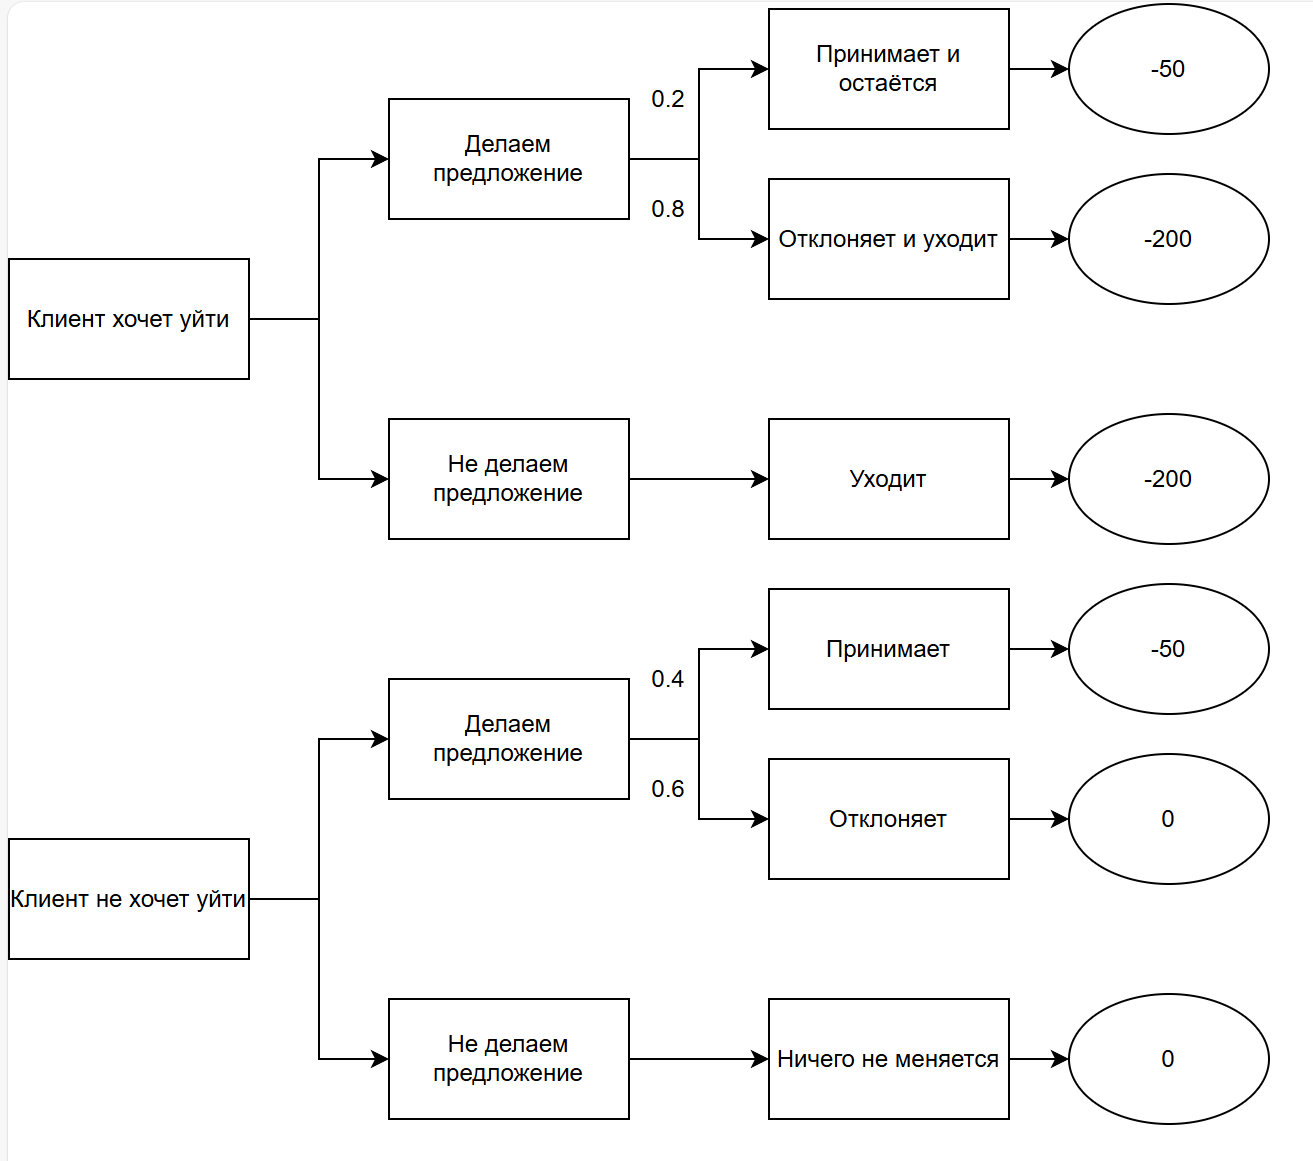<img src="./client_net.jpg" alt="" />

In [ ]:
A = 50
B = 200
p = 0.2
q = 0.4
P = np.sum(y_val)
N = len(y_val) - P

def get_cost(TP, FP, TN, FN):
    pass

Оптимальный порог: -0.5370719536338902


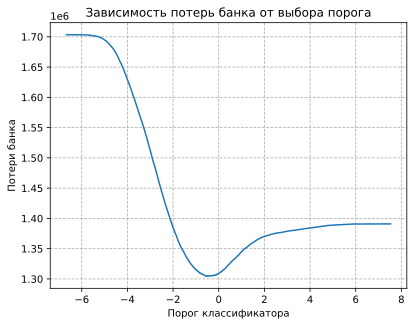

In [ ]:
# your code here

**(Бонус) Задание 6.2 (0.5 баллов):** Придумайте более "адекватную" модель удержания клиентов. Приветствуется любой креатив!

# (Бонус) Vowpal Wabbit

В этой части мы научимся использовать библиотеку [vowpal wabbit](https://github.com/JohnLangford/vowpal_wabbit). У неё есть несколько особенностей:
- можно обучать только линейные модели, но за счёт большого количества опций и возможностей по усложнению, можно построить и довольно сложные вещи
- можно обучаться на выборках, которые не помещаются в оперативную память
- можно обрабатывать большое количество признаков (например, мешки слов текстов) и "на ходу" строить на них комбинации (не переделывать датасет)
- другие особенности, как например, активное обучение и возможность распараллеленного обучения.

Основные особенности при использовании следующие:
- Свой формат данных: "label |A feature1:value1 |B feature2:value2", позволяющий, во-первых, указывать не все признаки (не нужно хранить много нулей в разреженных данных), а во-вторых, группировать и иметь возможность отключать или взаимодействовать ("отключать", добавлять квадратичные признаки и т.д.) сразу со всей группой признаков. По этой причине вам понадобится реализовать конвертер датасета и загрузку своих предсказаний, чтобы посчитать качество предсказаний.
- Запуск обучения из командной строки (однако можно запускать эти же команды из ноутбука).

В этот раз мы будем использовать данные с конкурса [Kaggle Avazu Click-Through Rate Prediction](https://www.kaggle.com/c/avazu-ctr-prediction) по предсказанию кликов (бинарная классификация). В обучающей выборке 40kk строк, так что у вас не должно быть желания загружать их в оперативную память. Предлагается взять первые 30kk строк в качестве обучающей выборке и оставшуюся часть для тестирования.

<font color="red"> !!ВНИМАНИЕ!! ХАЛЯВНЫЕ БАЛЛЫ!! ЗАДАНИЕ НА 0.5 БАЛЛА НЕСЛОЖНОЕ И ОЧЕНЬ ПОЛЕЗНОЕ!!</font>

__Задание 13.__ Работа с vowpal wabbit.

- Скачайте данные, разделите их на обучающую и тестовую выборки.
- Подготовьте функции для конвертирования датасета в формат vowpal wabbit и для загрузки предсказаний в ноутбук для подсчёта функционала.
- Сделайте простейшее решение на vowpal wabbit. Оцените качество.
- Изучите возможности и параметры vowpal wabbit. Поэксперементируйте.
- Расскажите, что интересного вы узнали (какие-нибудь особенности, режимы работы, фишки, параметры).
- Удалось ли вам улучшить качество базовой модели? Насколько? Что ещё можно было бы попробовать?

В этом задании предусмотрены баллы по двум критериям:
- Мы видим, что вы **"поигрались" с vw**, а именно: запуск vw, обучение модели и предсказание ответов на нашем датасете (2-3 попытки обучения с разными параметрами, если не достигли 0.738), изменение значения/включения/выключения 2-3 параметров обучения с описанием того, что они делают. Несколько занимательных фактов и возможностей vowpal-wabbit __(0.5 балла)__.
- Достижение ROC-AUC на отложенной выборки более 0.738 __(1 балл)__

**Бонус (0.4 балла)** Вставьте картинку, описывающую ваш опыт выполнения этого ДЗ.

**Мем**